In [1]:
#📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
#Upload
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [5]:
#🌸 Step 2: Load Dataset (Iris)

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print(X.head())
print(y.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [6]:
# 🔍 Step 3: Normalize Features (Very important in KNN)
# KNN is distance-based, so features must be on same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# ✂️ Step 4: Split the Data (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# 🤖 Step 5: Train the KNN Model (Start with k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [9]:
# 📈 Step 6: Evaluate the KNN Model
y_pred = knn.predict(X_test)

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


🔍 Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



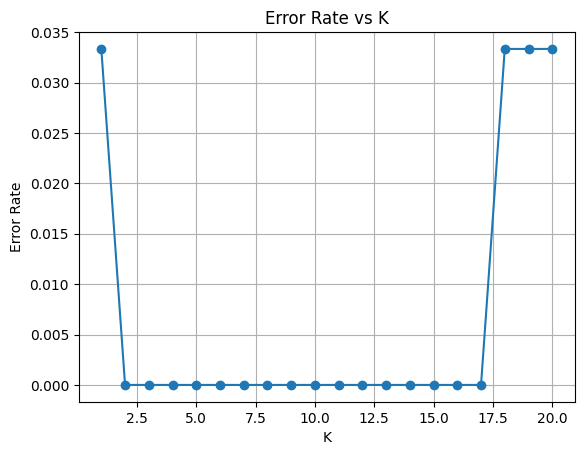

In [10]:
# 🔁 Step 7: Try Different K Values (to find best K)
error_rates = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rates.append(error)

# 📊 Plotting Error Rate vs K
plt.plot(range(1, 21), error_rates, marker='o')
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()
plt.show()


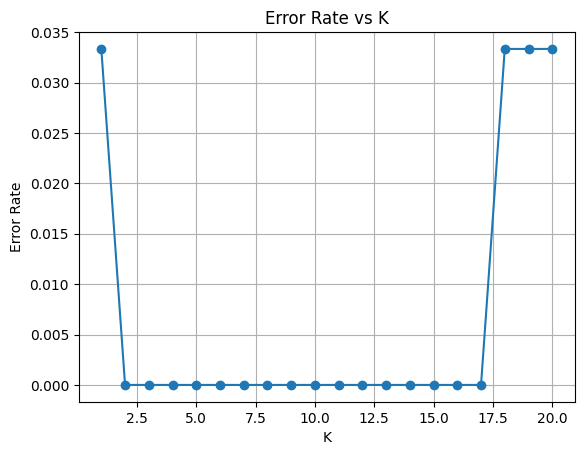

In [11]:
# 🔁 Step 7: Try Different K Values (to find best K)
error_rates = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rates.append(error)

# 📊 Plotting Error Rate vs K
plt.plot(range(1, 21), error_rates, marker='o')
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()
plt.show()
